# Polynomial Regression

## Import Libraries

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [65]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [66]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [67]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Split Dataset into Training Set and Test Set

**Note:** Skipping this step to maximize the data in order to make future prediction of salary between levels 6 and 7.

## Train Linear Regression Model on Whole Dataset

In [68]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

**Note:** Training is performed on both the simple linear regression and polynomial regression models to compare them to show polynomial regression is more adapted to this dataset.

## Train Polynomial Regression Model on Whole Dataset

**Notes:**

* Create a matrix of n-powered features used to train the polynomial regression model:
    * $x_1$
    * $x_1^2$
    * $x_1^n$
* The `degree` parameter is the number of n-powered features
* `X_poly` is the polynomial matrix of n-powered features
* `lin_poly_reg` is the polynomial regression using the `X_poly` matrix of features to train the model

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)

LinearRegression()

## Visualize Linear Regression Results

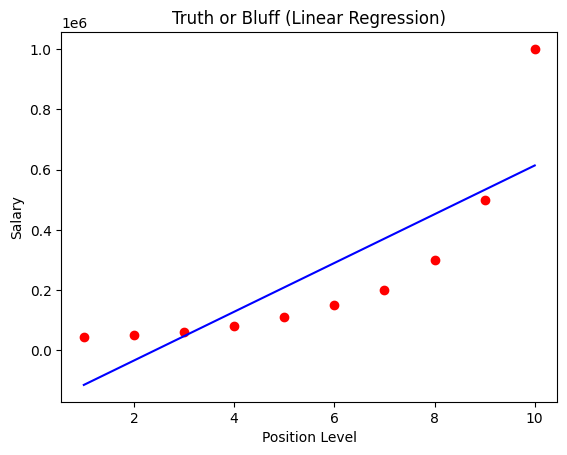

In [70]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualize Polynomial Regression Results

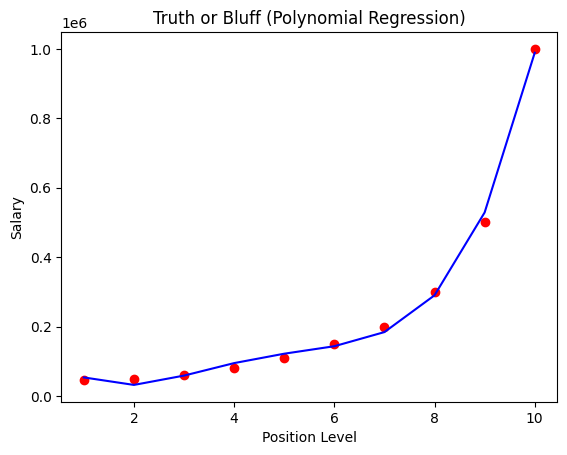

In [71]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_poly.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Result:** polynomial regression model predictions are well adapted for the use case.

## Visualize Polynomial Regression Results

### For Higher Resolution and Smoother Curve

The curve can be made smoother as a result of increasing the density of the position of features by including, not only integer values, but also values in between each by $0.1$.

For example: $1.1, 1.2, ..., 1.9$

This is done via the `arange` method with a density parameter of $0.1$.

In [72]:
X_grid = np.arange(min(X.flatten()), max(X.flatten()), 0.1)

In [73]:
print(X_grid)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


In [74]:
X_grid = X_grid.reshape(len(X_grid), 1)

In [75]:
print(X_grid)

[[1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2. ]
 [2.1]
 [2.2]
 [2.3]
 [2.4]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3. ]
 [3.1]
 [3.2]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.7]
 [3.8]
 [3.9]
 [4. ]
 [4.1]
 [4.2]
 [4.3]
 [4.4]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]
 [5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]
 [6. ]
 [6.1]
 [6.2]
 [6.3]
 [6.4]
 [6.5]
 [6.6]
 [6.7]
 [6.8]
 [6.9]
 [7. ]
 [7.1]
 [7.2]
 [7.3]
 [7.4]
 [7.5]
 [7.6]
 [7.7]
 [7.8]
 [7.9]
 [8. ]
 [8.1]
 [8.2]
 [8.3]
 [8.4]
 [8.5]
 [8.6]
 [8.7]
 [8.8]
 [8.9]
 [9. ]
 [9.1]
 [9.2]
 [9.3]
 [9.4]
 [9.5]
 [9.6]
 [9.7]
 [9.8]
 [9.9]]


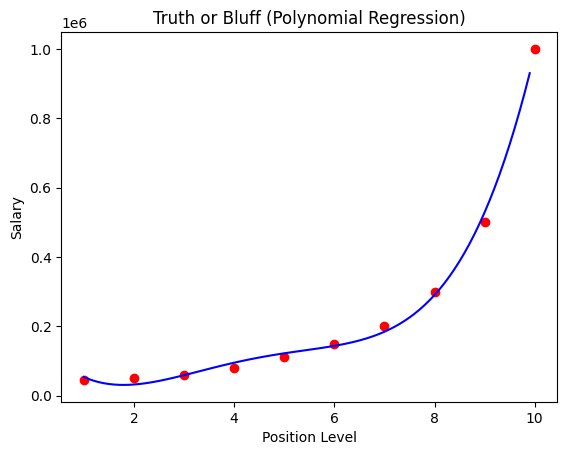

In [76]:
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_poly.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Result:** polynomial regression model predictions are more well adapted with higher resolution and smoother curve for the use case.

## Predict New Result with Linear Regression

Predict the salary at position level 6.5 with linear regression.

In [77]:
lin_reg.predict([[6.5]])

array([330378.78787879])

Linear regression model predicts a salary more than double that of $\$160,000$. Bad prediction.

## Predict New Result with Polynomial Regression

Predict a salary at position level 6.5 with polynomial regression.

In [78]:
lin_reg_poly.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265152])

Polynomial regression model predicts a salary very close to $\$160,000$. Good prediction.

**One is confident the salary expectation of the candidate is valid.**